In [1]:
# Conexión entre Google Colab y Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Análisis del Indice Standard & Poor's 500 o S&P 500

- Este indice representa las 500 empresas estadounidenses mas grandes seleccionadas por su tamaño, liquidez y representatividad por actividad económica.

- Los componentes del S&P 500 se dividen en 11 sectores, según la actividad económica que cada una realiza. Habitualmente, cada sector evoluciona de distinta manera dependiendo del estado general de la economía.

- Las compañías que componen el índice S&P 500 están estructuradas en 11 sectores:

    1- Consumo Discrecional.

    2- Consumo Básico.

    3- Energía.

    4- Financiero.

    5- Salud.

    6- Industria.

    7- Tecnología de la Información.

    8- Materiales.

    9- Inmobiliario.

    10- Servicios de Comunicación.

    11- Servicios Públicos.


- El indice refleja el estado de la economia de Estados Unidos.

- Las empresas deben cumplir las siguientes condiciones:

 - La empresa cotiza en la Bolsa de Nueva York (NYSE) o en el Nasdaq.
 - Su capitalización de mercado debe ser superior o igual a 14.600 millones de dólares.
 - Al menos el 50% de las acciones cotizan en bolsa.
 - La liquidez de las acciones de la empresa es elevada.
 - El beneficio de las operaciones de los últimos cuatro trimestres es positivo.

- El valor del índice S&P 500 se actualiza continuamente durante las horas de operación del mercado de valores, lo que permite a los inversores y analistas seguir el desempeño del mercado de valores en tiempo real. Los cambios en el valor del índice reflejan los cambios en el precio de las acciones de las empresas que lo componen.

- Los mejores ETFs del S&P 500:

  - Vanguard S&P 500 UCITS ETF
  - iShares Core S&P 500 UCITS ETF
  - Amundi Index S&P 500 UCITS ETF

In [ ]:
# Instalacion libreria Yahoo Finance
!pip install yfinance

- Libreria Yahoo finance: https://github.com/ranaroussi/yfinance

In [2]:
# Importamos librerias a utilizar
import yfinance as yf                           # Yahoo finance: toma los vaores de las acciones en tiempo real.
import pandas as pd                             # Pandas: permite hacer calculos.
import matplotlib.pyplot as plt                 # Matplotlib: permite graficar
import numpy as np                              # NumPy: permite hacer calculos.
from matplotlib.patches import Patch            # Matplotlib: permite graficar.
import warnings
import datetime as dt

### 1- Empresas que forman el Indice S&P 500, descriptas por industrias a la que pertenecen al dia 30/08/2024

In [3]:
# Tomamos datos de esta pagina
empresas500 = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

In [4]:
# Descargamos los datos
sp_empresas500 = pd.read_html(empresas500)[0]                                  # [0], es para cuando exportamos menos de tres tablas.

In [5]:
# Vemos los datos
sp_empresas500

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


En total son 503 empresas que conforman el Indice S&P 500.

In [6]:
# Se renombran las columnas
sp_empresas500.columns=["sym","name","sector","sub_sector","loc","date_added","cik_id","date_founded"]

# Se ordenan las columnas
sp_empresas500 = sp_empresas500.iloc[:,[6,0,1,4,2,3,5,7]]

In [7]:
sp_empresas500

,cik_id,sym,name,loc,sector,sub_sector,date_added,date_founded
0,66740,MMM,3M,"Saint Paul, Minnesota",Industrials,Industrial Conglomerates,1957-03-04,1902
1,91142,AOS,A. O. Smith,"Milwaukee, Wisconsin",Industrials,Building Products,2017-07-26,1916
2,1800,ABT,Abbott Laboratories,"North Chicago, Illinois",Health Care,Health Care Equipment,1957-03-04,1888
3,1551152,ABBV,AbbVie,"North Chicago, Illinois",Health Care,Biotechnology,2012-12-31,2013 (1888)
4,1467373,ACN,Accenture,"Dublin, Ireland",Information Technology,IT Consulting & Other Services,2011-07-06,1989
...,...,...,...,...,...,...,...,...
498,1524472,XYL,Xylem Inc.,"White Plains, New York",Industrials,Industrial Machinery & Supplies & Components,2011-11-01,2011
499,1041061,YUM,Yum! Brands,"Louisville, Kentucky",Consumer Discretionary,Restaurants,1997-10-06,1997
500,877212,ZBRA,Zebra Technologies,"Lincolnshire, Illinois",Information Technology,Electronic Equipment & Instruments,2019-12-23,1969
501,1136869,ZBH,Zimmer Biomet,"Warsaw, Indiana",Health Care,Health Care Equipment,2001-08-07,1927


In [8]:
# Valores duplicados
sp_empresas500.duplicated().sum()

0

In [9]:
# Valores nulos
sp_empresas500.isnull().sum()

,0
cik_id,0
sym,0
name,0
loc,0
sector,0
sub_sector,0
date_added,0
date_founded,0


In [10]:
# Vemos los tipos de datos de cada columna
sp_empresas500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cik_id        503 non-null    int64 
 1   sym           503 non-null    object
 2   name          503 non-null    object
 3   loc           503 non-null    object
 4   sector        503 non-null    object
 5   sub_sector    503 non-null    object
 6   date_added    503 non-null    object
 7   date_founded  503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB


In [ ]:
# Necesitamos extraer solo el año de la columna "data_added"
""" Como la columna "data_added" esta en formato object y la fecha esta organizada año-mes-dia,
solo nos vamos a quedar con los primeros cuatro caracteres (0, 4) usando el metodo slice()"""

sp_empresas500["added"] = sp_empresas500["date_added"].str.slice(0, 4)

<ipython-input-13-d9835325b06c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_empresas500["added"] = sp_empresas500["date_added"].str.slice(0, 4)


In [ ]:
# Convertimos los datos de la columna "data_added" a tipo de dato entero.
sp_empresas500["added"] = sp_empresas500["added"].astype(int)

<ipython-input-14-cdb5002751d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_empresas500["added"] = sp_empresas500["added"].astype(int)


In [ ]:
# Calculamos los años que estan las empresas en el Indice S&P 500.
sp_empresas500["years_in"] = 2025 - sp_empresas500["added"]                     # Hoy es 30/08/2024, pero colocamos 2025 por que las empresas que ingresaron ste año van a dar valor "0"

<ipython-input-15-13f820c64286>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_empresas500["years_in"] = 2025 - sp_empresas500["added"]                     # Hoy es 30/08/2024, pero colocamos 2025 por que las empresas que ingresaron ste año van a dar valor "0"


In [ ]:
sp_empresas500

,cik_id,sym,name,loc,sector,sub_sector,date_added,date_founded,added,years_in
0,66740,MMM,3M,"Saint Paul, Minnesota",Industrials,Industrial Conglomerates,1957-03-04,1902,1957,68
1,91142,AOS,A. O. Smith,"Milwaukee, Wisconsin",Industrials,Building Products,2017-07-26,1916,2017,8
2,1800,ABT,Abbott Laboratories,"North Chicago, Illinois",Health Care,Health Care Equipment,1957-03-04,1888,1957,68
3,1551152,ABBV,AbbVie,"North Chicago, Illinois",Health Care,Biotechnology,2012-12-31,2013 (1888),2012,13
4,1467373,ACN,Accenture,"Dublin, Ireland",Information Technology,IT Consulting & Other Services,2011-07-06,1989,2011,14
...,...,...,...,...,...,...,...,...,...,...
498,1524472,XYL,Xylem Inc.,"White Plains, New York",Industrials,Industrial Machinery & Supplies & Components,2011-11-01,2011,2011,14
499,1041061,YUM,Yum! Brands,"Louisville, Kentucky",Consumer Discretionary,Restaurants,1997-10-06,1997,1997,28
500,877212,ZBRA,Zebra Technologies,"Lincolnshire, Illinois",Information Technology,Electronic Equipment & Instruments,2019-12-23,1969,2019,6
501,1136869,ZBH,Zimmer Biomet,"Warsaw, Indiana",Health Care,Health Care Equipment,2001-08-07,1927,2001,24


In [ ]:
# Función "caracteres" para ver si hay caracteres especiales
def caracteres(columna):
    especiales = columna.str.contains("[.^@_,/*?]")

    return columna.loc[especiales]

In [ ]:
# Usamos la función "caracteres" en la columna "sym".
caracteres(sp_empresas500["sym"])

,sym
62,BRK.B
77,BF.B


In [ ]:
# Se reemplaza el "." por "-" en la columna "sym"
""" Se cambia por que el ticket en Yahoo finanzas apareces BRK-B (Berkshire Hathaway Inc.) y BF-B (Brown–Forman)"""

sp_empresas500["sym"] = sp_empresas500["sym"].str.replace(".", "-")

<ipython-input-22-0f5def690605>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_empresas500["sym"] = sp_empresas500["sym"].str.replace(".", "-")


In [ ]:
# Comprobamos y se busca en la columna "sym" si hay caracteres especiales
caracteres(sp_empresas500["sym"])

,sym


In [ ]:
sp_empresas500

,cik_id,sym,name,loc,sector,sub_sector,date_added,date_founded,added,years_in
0,66740,MMM,3M,"Saint Paul, Minnesota",Industrials,Industrial Conglomerates,1957-03-04,1902,1957,68
1,91142,AOS,A. O. Smith,"Milwaukee, Wisconsin",Industrials,Building Products,2017-07-26,1916,2017,8
2,1800,ABT,Abbott Laboratories,"North Chicago, Illinois",Health Care,Health Care Equipment,1957-03-04,1888,1957,68
3,1551152,ABBV,AbbVie,"North Chicago, Illinois",Health Care,Biotechnology,2012-12-31,2013 (1888),2012,13
4,1467373,ACN,Accenture,"Dublin, Ireland",Information Technology,IT Consulting & Other Services,2011-07-06,1989,2011,14
...,...,...,...,...,...,...,...,...,...,...
498,1524472,XYL,Xylem Inc.,"White Plains, New York",Industrials,Industrial Machinery & Supplies & Components,2011-11-01,2011,2011,14
499,1041061,YUM,Yum! Brands,"Louisville, Kentucky",Consumer Discretionary,Restaurants,1997-10-06,1997,1997,28
500,877212,ZBRA,Zebra Technologies,"Lincolnshire, Illinois",Information Technology,Electronic Equipment & Instruments,2019-12-23,1969,2019,6
501,1136869,ZBH,Zimmer Biomet,"Warsaw, Indiana",Health Care,Health Care Equipment,2001-08-07,1927,2001,24


In [ ]:
sp_empresas500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cik_id        503 non-null    int64 
 1   sym           503 non-null    object
 2   name          503 non-null    object
 3   loc           503 non-null    object
 4   sector        503 non-null    object
 5   sub_sector    503 non-null    object
 6   date_added    503 non-null    object
 7   date_founded  503 non-null    object
 8   added         503 non-null    int64 
 9   years_in      503 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 39.4+ KB


In [ ]:
# Guardamos en un archivos csv
sp_empresas500.to_csv("empresas_del_sp500.csv")

### 2- Cotización de empresas que forman el Indice S&P 500, desde el año 1995 al 2024.

Se considerar análizar el Indice S&P 500 desde el año 1995 al año 2024, con la idea de ver las distintas crisis:

- 1995-2005: Este periodo incluye la burbuja de las punto com y su colapso, así como los primeros años de recuperación.

- 2005-2015: Incluye la crisis financiera de 2008 y la recuperación posterior.

- 2015-2024: Este periodo abarca la pandemia de COVID-19 y la recuperación económica reciente.

Cada uno de estos periodos tiene sus propias características y desafíos, lo que puede proporcionar diferentes perspectivas sobre la evolución de los sectores industriales.

In [ ]:
# Se crea una lista de los tickets presentes en el dataframe sp_empresas500.
empresas_sym = list(sp_empresas500["sym"])
empresas_sym

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CAG'

In [ ]:
# Se descaga de Yahoo finance los datos del "precio de cierre" ajustado de las acciones de las 500 empresas.

empresas500_cotizacion = yf.download(empresas_sym, start="1995-01-01", end="2024-08-29", rounding=True)["Adj Close"]

[*********************100%***********************]  503 of 503 completed


In [ ]:
# Vemos lo que se descargo de Yahoo finance
empresas500_cotizacion

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1995-01-03 00:00:00+00:00,NaN,NaN,0.29,NaN,NaN,3.54,NaN,NaN,3.59,3.49,...,NaN,5.37,NaN,6.04,5.98,NaN,NaN,NaN,8.33,NaN
1995-01-04 00:00:00+00:00,NaN,NaN,0.29,NaN,NaN,3.54,NaN,NaN,3.49,3.40,...,NaN,5.25,NaN,6.06,6.01,NaN,NaN,NaN,8.22,NaN
1995-01-05 00:00:00+00:00,NaN,NaN,0.29,NaN,NaN,3.51,NaN,NaN,3.63,3.44,...,NaN,5.35,NaN,6.07,6.02,NaN,NaN,NaN,8.22,NaN
1995-01-06 00:00:00+00:00,NaN,NaN,0.31,NaN,NaN,3.46,NaN,NaN,3.70,3.53,...,NaN,5.46,NaN,6.06,6.02,NaN,NaN,NaN,8.22,NaN
1995-01-09 00:00:00+00:00,NaN,NaN,0.31,NaN,NaN,3.45,NaN,NaN,3.75,3.57,...,NaN,5.60,NaN,6.07,5.97,NaN,NaN,NaN,8.31,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-22 00:00:00+00:00,140.22,10.14,224.53,196.37,115.45,112.10,106.51,330.57,557.44,221.91,...,285.14,30.06,77.09,59.92,114.73,135.06,136.08,113.42,342.16,182.17
2024-08-23 00:00:00+00:00,140.87,10.39,226.84,197.55,116.85,112.69,109.02,333.27,558.30,228.39,...,281.46,31.15,77.37,60.12,116.32,136.56,134.85,115.05,351.62,180.90
2024-08-26 00:00:00+00:00,140.49,10.21,227.18,197.44,115.71,112.70,109.49,336.78,559.44,225.61,...,285.40,30.88,77.24,61.46,118.81,135.89,134.28,114.63,347.69,181.56


In [ ]:
# Colocamos un indece a la tabla
empresas500_cotizacion_index = empresas500_cotizacion.reset_index()

In [ ]:
empresas500_cotizacion_index.head(3)

Ticker,Date,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
0,1995-01-03 00:00:00+00:00,NaN,NaN,0.29,NaN,NaN,3.54,NaN,NaN,3.59,...,NaN,5.37,NaN,6.04,5.98,NaN,NaN,NaN,8.33,NaN
1,1995-01-04 00:00:00+00:00,NaN,NaN,0.29,NaN,NaN,3.54,NaN,NaN,3.49,...,NaN,5.25,NaN,6.06,6.01,NaN,NaN,NaN,8.22,NaN
2,1995-01-05 00:00:00+00:00,NaN,NaN,0.29,NaN,NaN,3.51,NaN,NaN,3.63,...,NaN,5.35,NaN,6.07,6.02,NaN,NaN,NaN,8.22,NaN


In [ ]:
# Pasamos "Date" a tipo de dato string para poder extraer las fechas.
empresas500_cotizacion_index["Date"] = empresas500_cotizacion_index["Date"].astype(str)

In [ ]:
# Nos quedamos con la fecha de la columna "Date"
empresas500_cotizacion_index["Date"] = empresas500_cotizacion_index["Date"].str.slice(0, 10)

In [ ]:
empresas500_cotizacion_index

Ticker,Date,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
0,1995-01-03,NaN,NaN,0.29,NaN,NaN,3.54,NaN,NaN,3.59,...,NaN,5.37,NaN,6.04,5.98,NaN,NaN,NaN,8.33,NaN
1,1995-01-04,NaN,NaN,0.29,NaN,NaN,3.54,NaN,NaN,3.49,...,NaN,5.25,NaN,6.06,6.01,NaN,NaN,NaN,8.22,NaN
2,1995-01-05,NaN,NaN,0.29,NaN,NaN,3.51,NaN,NaN,3.63,...,NaN,5.35,NaN,6.07,6.02,NaN,NaN,NaN,8.22,NaN
3,1995-01-06,NaN,NaN,0.31,NaN,NaN,3.46,NaN,NaN,3.70,...,NaN,5.46,NaN,6.06,6.02,NaN,NaN,NaN,8.22,NaN
4,1995-01-09,NaN,NaN,0.31,NaN,NaN,3.45,NaN,NaN,3.75,...,NaN,5.60,NaN,6.07,5.97,NaN,NaN,NaN,8.31,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461,2024-08-22,140.22,10.14,224.53,196.37,115.45,112.10,106.51,330.57,557.44,...,285.14,30.06,77.09,59.92,114.73,135.06,136.08,113.42,342.16,182.17
7462,2024-08-23,140.87,10.39,226.84,197.55,116.85,112.69,109.02,333.27,558.30,...,281.46,31.15,77.37,60.12,116.32,136.56,134.85,115.05,351.62,180.90
7463,2024-08-26,140.49,10.21,227.18,197.44,115.71,112.70,109.49,336.78,559.44,...,285.40,30.88,77.24,61.46,118.81,135.89,134.28,114.63,347.69,181.56
7464,2024-08-27,141.10,10.17,228.03,195.92,116.74,113.10,110.68,340.38,567.82,...,288.04,30.40,77.04,60.89,117.68,135.06,134.50,114.67,346.04,182.10


In [ ]:
# Creamos una nueva columna con el año y el trimestre
empresas500_cotizacion_index['YearQuarter'] = empresas500_cotizacion_index['Date'].apply(lambda x: x[:4] + 'Q' + str((int(x[5:7]) - 1) // 3 + 1))

# Convertimos la columna 'YearQuarter' a tipo string (si no lo es ya)
empresas500_cotizacion_index['YearQuarter'] = empresas500_cotizacion_index['YearQuarter'].astype(str)

# Agrupamos por 'YearQuarter' y calculamos la media de las columnas numéricas
empresas500_cotizacion_trimestre = empresas500_cotizacion_index.groupby('YearQuarter').mean(numeric_only=True)
# El parámetro numeric_only=True asegura que solo se calculen las medias de las columnas numéricas.

In [ ]:
empresas500_cotizacion_trimestre

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
YearQuarter,,,,,,,,,,,,,,,,,,,,,
1995Q1,NaN,NaN,0.300476,NaN,NaN,3.776190,NaN,NaN,4.190635,3.767937,...,NaN,5.481587,NaN,6.115079,6.292540,NaN,NaN,NaN,8.768889,NaN
1995Q2,NaN,NaN,0.311746,NaN,NaN,4.292063,NaN,NaN,6.716190,4.671270,...,NaN,6.009841,NaN,6.287302,7.029683,NaN,NaN,NaN,10.395397,NaN
1995Q3,NaN,NaN,0.326667,NaN,NaN,4.318730,2.357500,NaN,6.886667,5.574921,...,NaN,6.639524,NaN,6.202698,7.231270,NaN,NaN,NaN,13.129683,NaN
1995Q4,NaN,NaN,0.276984,NaN,NaN,4.492540,2.351111,NaN,7.323651,5.481270,...,NaN,6.334762,NaN,6.756984,7.970635,NaN,NaN,NaN,13.381111,NaN
1996Q1,NaN,NaN,0.217143,NaN,NaN,4.623016,2.298889,NaN,4.508413,5.903810,...,NaN,6.383016,NaN,7.294127,8.397460,NaN,NaN,NaN,13.173492,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023Q3,118.960794,15.522063,182.336667,141.182222,138.062540,102.832857,77.823651,309.964286,524.631429,181.351905,...,210.439683,31.837460,99.053333,57.949524,105.573968,101.741905,128.616667,125.953810,271.507302,179.708571
2023Q4,118.361905,12.555714,183.836190,141.591429,128.947143,98.356190,81.724286,318.437778,576.755556,176.488254,...,228.937937,30.281429,87.797619,58.293968,101.999524,98.821905,122.615556,110.920635,228.265714,175.574444
2024Q1,136.492787,14.507377,181.269016,168.997049,151.389344,113.406557,84.547377,361.284590,573.190984,190.896557,...,261.352951,33.184754,98.541967,56.025246,102.521967,120.015574,131.871639,124.412295,267.628852,186.250328


In [ ]:
# Agrupamos por año y se calcula la media de cada empresa
# empresas500_cotizacion_index = empresas500_cotizacion_index.groupby("Date").mean(numeric_only=True)

In [ ]:
empresas500_cotizacion_index.head(3)

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1995,NaN,NaN,0.303968,NaN,NaN,4.219881,2.352133,NaN,6.279286,4.873849,...,NaN,6.116429,NaN,6.340516,7.131032,NaN,NaN,NaN,11.418770,NaN
1996,NaN,NaN,0.187913,NaN,NaN,5.082598,2.108976,NaN,4.472598,6.176417,...,NaN,6.638780,NaN,7.052756,8.981457,NaN,NaN,NaN,11.178622,NaN
1997,NaN,NaN,0.135455,NaN,NaN,7.066126,2.233320,NaN,5.087747,8.952411,...,NaN,7.783320,NaN,7.768458,12.757945,NaN,3.939324,NaN,12.729723,NaN


In [ ]:
# Copiamos el dataframe
empresas500_cotizacion_index_trans = empresas500_cotizacion_index.copy()

In [ ]:
# Transponemos el DataFrame, es decir, convierte las filas en columnas y las columnas en filas.
empresas500_cotizacion_index_trans = empresas500_cotizacion_index_trans.T

In [ ]:
empresas500_cotizacion_index_trans

Date,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Ticker,,,,,,,,,,,,,,,,,,,,,
A,NaN,NaN,NaN,NaN,29.229000,42.158413,20.211895,13.874563,12.238452,16.251865,...,36.739960,40.682937,56.230916,64.210040,72.553413,90.050316,141.736944,131.002948,126.98872,137.308614
AAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.940198,36.716349,46.101195,41.898247,30.571825,15.271621,20.343214,15.269920,14.57796,12.944036
AAPL,0.303968,0.187913,0.135455,0.230397,0.435754,0.689286,0.305081,0.288452,0.279762,0.535794,...,26.995476,24.011865,35.211355,44.890159,50.230159,93.041265,138.498452,152.943466,171.47028,193.594458
ABBV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.173175,42.762421,55.062271,73.742948,61.948452,76.462806,99.872222,136.875697,141.58536,170.380783
ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,147.626000,167.589802,125.099084,124.61028,147.503795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.488690,40.786190,52.069960,67.319283,72.604524,75.375534,112.880833,91.020319,101.72960,129.449217
YUM,NaN,NaN,3.939324,4.375476,6.251984,3.780556,5.290161,6.944881,7.058968,9.758968,...,48.584325,51.387500,63.564622,75.526614,94.663294,86.213676,112.785238,114.099363,126.95932,133.617108
ZBH,NaN,NaN,NaN,NaN,NaN,NaN,25.510467,31.317222,44.310714,68.497262,...,98.257302,103.547698,108.916932,108.790239,119.921905,125.638538,145.019603,114.241076,123.84188,118.131024


In [ ]:
# Reseteamos el índice del DataFrame, convirtiendo el índice actual en una columna y creando un nuevo índice numérico.
empresas500_cotizacion_index_trans = empresas500_cotizacion_index_trans.reset_index()

# Cambio de nombre de la columna "Ticker" por "sym", para poder relacionar las tablas en Power BI
empresas500_cotizacion_index_trans = empresas500_cotizacion_index_trans.rename(columns={"Ticker": "sym"})
empresas500_cotizacion_index_trans


Date,sym,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,A,NaN,NaN,NaN,NaN,29.229000,42.158413,20.211895,13.874563,12.238452,...,36.739960,40.682937,56.230916,64.210040,72.553413,90.050316,141.736944,131.002948,126.98872,137.308614
1,AAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.940198,36.716349,46.101195,41.898247,30.571825,15.271621,20.343214,15.269920,14.57796,12.944036
2,AAPL,0.303968,0.187913,0.135455,0.230397,0.435754,0.689286,0.305081,0.288452,0.279762,...,26.995476,24.011865,35.211355,44.890159,50.230159,93.041265,138.498452,152.943466,171.47028,193.594458
3,ABBV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.173175,42.762421,55.062271,73.742948,61.948452,76.462806,99.872222,136.875697,141.58536,170.380783
4,ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,147.626000,167.589802,125.099084,124.61028,147.503795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,XYL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.488690,40.786190,52.069960,67.319283,72.604524,75.375534,112.880833,91.020319,101.72960,129.449217
499,YUM,NaN,NaN,3.939324,4.375476,6.251984,3.780556,5.290161,6.944881,7.058968,...,48.584325,51.387500,63.564622,75.526614,94.663294,86.213676,112.785238,114.099363,126.95932,133.617108
500,ZBH,NaN,NaN,NaN,NaN,NaN,NaN,25.510467,31.317222,44.310714,...,98.257302,103.547698,108.916932,108.790239,119.921905,125.638538,145.019603,114.241076,123.84188,118.131024
501,ZBRA,11.418770,11.178622,12.729723,15.002738,17.905040,22.327103,20.321048,24.501230,33.005595,...,89.878492,64.032024,99.310319,150.661315,206.708492,266.642490,518.283373,343.300319,270.44272,297.138795


In [ ]:
empresas500_cotizacion_index_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sym     503 non-null    object 
 1   1995    314 non-null    float64
 2   1996    320 non-null    float64
 3   1997    333 non-null    float64
 4   1998    344 non-null    float64
 5   1999    355 non-null    float64
 6   2000    364 non-null    float64
 7   2001    377 non-null    float64
 8   2002    382 non-null    float64
 9   2003    385 non-null    float64
 10  2004    396 non-null    float64
 11  2005    407 non-null    float64
 12  2006    413 non-null    float64
 13  2007    424 non-null    float64
 14  2008    428 non-null    float64
 15  2009    432 non-null    float64
 16  2010    442 non-null    float64
 17  2011    448 non-null    float64
 18  2012    456 non-null    float64
 19  2013    465 non-null    float64
 20  2014    472 non-null    float64
 21  2015    478 non-null    float64
 22  20

In [ ]:
# Guardamos en un archivo csv
empresas500_cotizacion_index_trans.to_csv("500empresas_1995al2024.csv")

### 3- ETF del Indice S&P 500 y el Indice VIX.

El SPDR S&P 500 ETF Trust (SPY) es uno de los fondos cotizados en bolsa (ETF) más populares y antiguos en los Estados Unidos.

- Símbolo: SPY

- Emisor: SPDR (Standard & Poor’s Depositary Receipts)

- Objetivo: Seguir el índice S&P 500, que incluye 500 de las mayores empresas de EE.UU.

- Fecha de creación: 22 de enero de 1993

- Activos bajo gestión: Aproximadamente $562.5 mil millones

- Rendimiento anual hasta la fecha (YTD): 18.22 %

- Ratio de gastos: 0.09 %

- Dividendos: Rendimiento del 1.24%

- Distribución porcentual de los sectores dentro del SPDR S&P 500 ETF Trust (SPY):

    - Tecnología: 32.29%
    - Servicios Financieros: 12.63%
    - Salud: 11.89%
    - Consumo Discrecional: 10.70%
    - Industriales: 8.79%
    - Bienes de Consumo Básico: 7.00%
    - Energía: 4.50%
    - Servicios de Comunicación: 9.80%
    - Materiales: 2.60%
    - Servicios Públicos: 2.80%
    - Bienes Raíces: 2.00%

In [ ]:
# Descargamos el indice SPY ajustado
"""
El cierre ajustado de un ETF como el SPDR S&P 500 (SPY) es una medida importante que tiene en cuenta no solo el precio de cierre de la acción,
sino también los dividendos y divisiones de acciones.
Esto proporciona una visión más precisa de cómo ha evolucionado el valor del ETF, eliminando distorsiones causadas por eventos corporativos.
"""

sp500 = yf.download("SPY", start="1995-01-01", end="2024-08-29", rounding=True)["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [ ]:
sp500

,Adj Close
Date,
1995-01-03,27.07
1995-01-04,27.20
1995-01-05,27.20
1995-01-06,27.23
1995-01-09,27.25
...,...
2024-08-22,556.22
2024-08-23,562.13
2024-08-26,560.79


In [ ]:
# Descargamos el índice VIX
vix = yf.download("^VIX", start="1995-01-01", end="2024-08-29", rounding=True)["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [ ]:
vix

,Adj Close
Date,
1995-01-03,14.25
1995-01-04,13.53
1995-01-05,13.50
1995-01-06,13.13
1995-01-09,13.33
...,...
2024-08-22,17.55
2024-08-23,15.86
2024-08-26,16.15


In [ ]:
# Convertimos las series de tiempo a dataframes y reseteamos los índices
sp500_df = sp500.to_frame().reset_index()
vix_df = vix.to_frame().reset_index()

In [ ]:
# Extraemos el año de la columna 'Date' en ambos dataframes
sp500_df['Date'] = sp500_df['Date'].dt.year
vix_df['Date'] = vix_df['Date'].dt.year

In [ ]:
# Agrupamos por año y calculamos la media
sp500_df = sp500_df.groupby('Date').mean()
vix_df = vix_df.groupby('Date').mean()

In [ ]:
sp500_df.head(2)

,Adj Close
Date,
1995,32.435714
1996,40.979291


In [ ]:
vix_df.head(2)

,Adj Close
Date,
1995,12.388770
1996,16.442165


In [ ]:
# Aca se pueden guardar cada indice en un archivo csv por separado
sp500_df.to_csv("spy_1995al2024.csv")
vix_df.to_csv("vix_1995al2024.csv")

### 4- Graficos

In [ ]:
# Descargamos los csv
empresas503_95al24 = pd.read_csv("/content/500empresas_1995al2024.csv")
empresas503_sp500 = pd.read_csv("/content/empresas_del_sp500.csv")
spy_95al24 = pd.read_csv("/content/spy_1995al2024.csv")
vix_95al24 = pd.read_csv("/content/vix_1995al2024.csv")

In [ ]:
empresas503_95al24

,Unnamed: 0,sym,1995,1996,1997,1998,1999,2000,2001,2002,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,0,A,NaN,NaN,NaN,NaN,29.229000,42.158413,20.211895,13.874563,...,36.739960,40.682937,56.230916,64.210040,72.553413,90.050316,141.736944,131.002948,126.98872,137.308614
1,1,AAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.940198,36.716349,46.101195,41.898247,30.571825,15.271621,20.343214,15.269920,14.57796,12.944036
2,2,AAPL,0.303968,0.187913,0.135455,0.230397,0.435754,0.689286,0.305081,0.288452,...,26.995476,24.011865,35.211355,44.890159,50.230159,93.041265,138.498452,152.943466,171.47028,193.594458
3,3,ABBV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.173175,42.762421,55.062271,73.742948,61.948452,76.462806,99.872222,136.875697,141.58536,170.380783
4,4,ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,147.626000,167.589802,125.099084,124.61028,147.503795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,498,XYL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.488690,40.786190,52.069960,67.319283,72.604524,75.375534,112.880833,91.020319,101.72960,129.449217
499,499,YUM,NaN,NaN,3.939324,4.375476,6.251984,3.780556,5.290161,6.944881,...,48.584325,51.387500,63.564622,75.526614,94.663294,86.213676,112.785238,114.099363,126.95932,133.617108
500,500,ZBH,NaN,NaN,NaN,NaN,NaN,NaN,25.510467,31.317222,...,98.257302,103.547698,108.916932,108.790239,119.921905,125.638538,145.019603,114.241076,123.84188,118.131024
501,501,ZBRA,11.418770,11.178622,12.729723,15.002738,17.905040,22.327103,20.321048,24.501230,...,89.878492,64.032024,99.310319,150.661315,206.708492,266.642490,518.283373,343.300319,270.44272,297.138795


from matplotlib import pyplot as plt
empresas503_95al24['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
empresas503_95al24['1995'].plot(kind='hist', bins=20, title='1995')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
empresas503_95al24['1996'].plot(kind='hist', bins=20, title='1996')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
empresas503_95al24['1997'].plot(kind='hist', bins=20, title='1997')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
empresas503_95al24.plot(kind='scatter', x='Unnamed: 0', y='1995', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
empresas503_95al24.plot(kind='scatter', x='1995', y='1996', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
empresas503_95al24.plot(kind='scatter', x='1996', y='1997', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
empresas503_95al24.plot(kind='scatter', x='1997', y='1998', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['1995']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = empresas503_95al24.sort_values('Unnamed: 0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('1995')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['1996']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = empresas503_95al24.sort_values('Unnamed: 0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('1996')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['1997']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = empresas503_95al24.sort_values('Unnamed: 0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('1997')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['1998']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = empresas503_95al24.sort_values('Unnamed: 0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('1998')

from matplotlib import pyplot as plt
empresas503_95al24['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
empresas503_95al24['1995'].plot(kind='line', figsize=(8, 4), title='1995')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
empresas503_95al24['1996'].plot(kind='line', figsize=(8, 4), title='1996')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
empresas503_95al24['1997'].plot(kind='line', figsize=(8, 4), title='1997')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
empresas503_sp500

,Unnamed: 0,cik_id,sym,name,loc,sector,sub_sector,date_added,date_founded,added,years_in
0,0,66740,MMM,3M,"Saint Paul, Minnesota",Industrials,Industrial Conglomerates,1957-03-04,1902,1957,68
1,1,91142,AOS,A. O. Smith,"Milwaukee, Wisconsin",Industrials,Building Products,2017-07-26,1916,2017,8
2,2,1800,ABT,Abbott Laboratories,"North Chicago, Illinois",Health Care,Health Care Equipment,1957-03-04,1888,1957,68
3,3,1551152,ABBV,AbbVie,"North Chicago, Illinois",Health Care,Biotechnology,2012-12-31,2013 (1888),2012,13
4,4,1467373,ACN,Accenture,"Dublin, Ireland",Information Technology,IT Consulting & Other Services,2011-07-06,1989,2011,14
...,...,...,...,...,...,...,...,...,...,...,...
498,498,1524472,XYL,Xylem Inc.,"White Plains, New York",Industrials,Industrial Machinery & Supplies & Components,2011-11-01,2011,2011,14
499,499,1041061,YUM,Yum! Brands,"Louisville, Kentucky",Consumer Discretionary,Restaurants,1997-10-06,1997,1997,28
500,500,877212,ZBRA,Zebra Technologies,"Lincolnshire, Illinois",Information Technology,Electronic Equipment & Instruments,2019-12-23,1969,2019,6
501,501,1136869,ZBH,Zimmer Biomet,"Warsaw, Indiana",Health Care,Health Care Equipment,2001-08-07,1927,2001,24


from matplotlib import pyplot as plt
empresas503_sp500['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
empresas503_sp500['cik_id'].plot(kind='hist', bins=20, title='cik_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
empresas503_sp500['added'].plot(kind='hist', bins=20, title='added')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
empresas503_sp500['years_in'].plot(kind='hist', bins=20, title='years_in')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
empresas503_sp500.plot(kind='scatter', x='Unnamed: 0', y='cik_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
empresas503_sp500.plot(kind='scatter', x='cik_id', y='added', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
empresas503_sp500.plot(kind='scatter', x='added', y='years_in', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['cik_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = empresas503_sp500.sort_values('Unnamed: 0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('cik_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['added']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = empresas503_sp500.sort_values('Unnamed: 0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('added')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['years_in']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = empresas503_sp500.sort_values('Unnamed: 0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('years_in')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Unnamed: 0']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Unnamed: 0'}, axis=1)
              .sort_values('Unnamed: 0', ascending=True))
  xs = counted['Unnamed: 0']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = empresas503_sp500.sort_values('Unnamed: 0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
empresas503_sp500['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
empresas503_sp500['cik_id'].plot(kind='line', figsize=(8, 4), title='cik_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
empresas503_sp500['added'].plot(kind='line', figsize=(8, 4), title='added')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
empresas503_sp500['years_in'].plot(kind='line', figsize=(8, 4), title='years_in')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
spy_95al24

,Date,Adj Close
0,1995,32.435714
1,1996,40.979291
2,1997,54.323518
3,1998,68.465675
4,1999,84.766429
5,2000,92.074524
6,2001,77.987218
7,2002,65.838810
8,2003,65.085476
9,2004,77.416508


from matplotlib import pyplot as plt
spy_95al24['Date'].plot(kind='hist', bins=20, title='Date')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
spy_95al24['Adj Close'].plot(kind='hist', bins=20, title='Adj Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
spy_95al24.plot(kind='scatter', x='Date', y='Adj Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Adj Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = spy_95al24.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Adj Close')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = spy_95al24.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
spy_95al24['Date'].plot(kind='line', figsize=(8, 4), title='Date')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
spy_95al24['Adj Close'].plot(kind='line', figsize=(8, 4), title='Adj Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
vix_95al24

,Date,Adj Close
0,1995,12.388770
1,1996,16.442165
2,1997,22.378577
3,1998,25.602976
4,1999,24.372976
5,2000,23.315000
6,2001,25.749677
7,2002,27.292460
8,2003,21.982857
9,2004,15.480357


from matplotlib import pyplot as plt
vix_95al24['Date'].plot(kind='hist', bins=20, title='Date')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
vix_95al24['Adj Close'].plot(kind='hist', bins=20, title='Adj Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
vix_95al24.plot(kind='scatter', x='Date', y='Adj Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Adj Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = vix_95al24.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Adj Close')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = vix_95al24.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
vix_95al24['Date'].plot(kind='line', figsize=(8, 4), title='Date')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
vix_95al24['Adj Close'].plot(kind='line', figsize=(8, 4), title='Adj Close')
plt.gca().spines[['top', 'right']].set_visible(False)

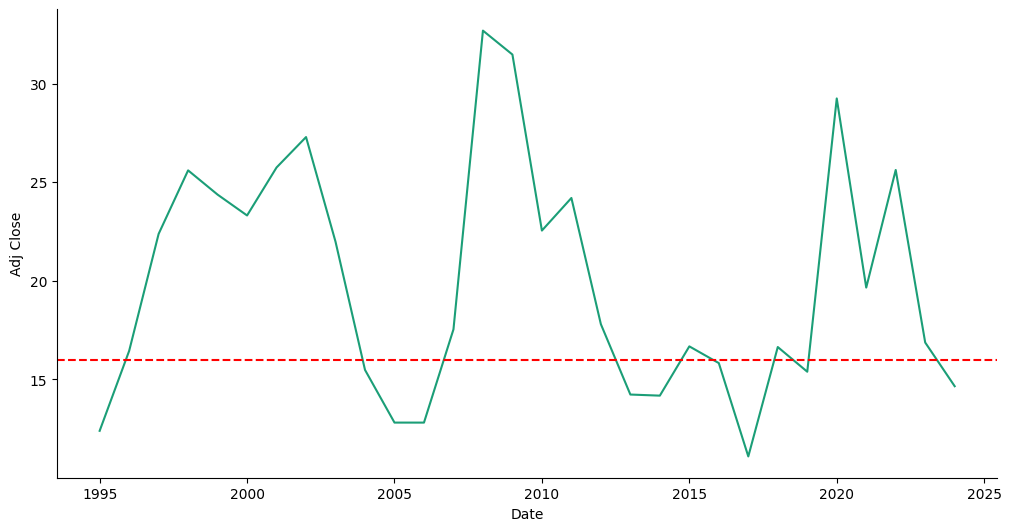

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Adj Close']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = vix_95al24.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.axhline(y=16, color='r', linestyle='--')
_ = plt.ylabel('Adj Close')

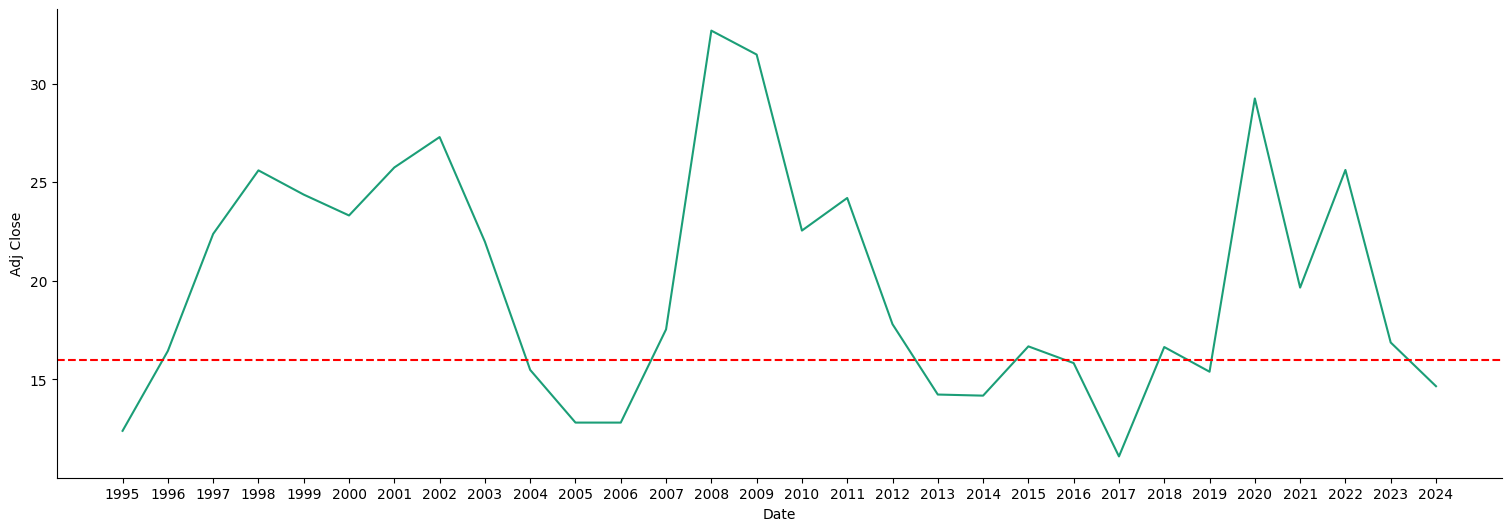

In [ ]:
# prompt: como hago para que le grafico anterior tenga escrito en el eje x todos los años analizados?

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Adj Close']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(15, 5.2), layout='constrained')
df_sorted = vix_95al24.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.xticks(df_sorted['Date']) # add this line
plt.axhline(y=16, color='r', linestyle='--')
_ = plt.ylabel('Adj Close')


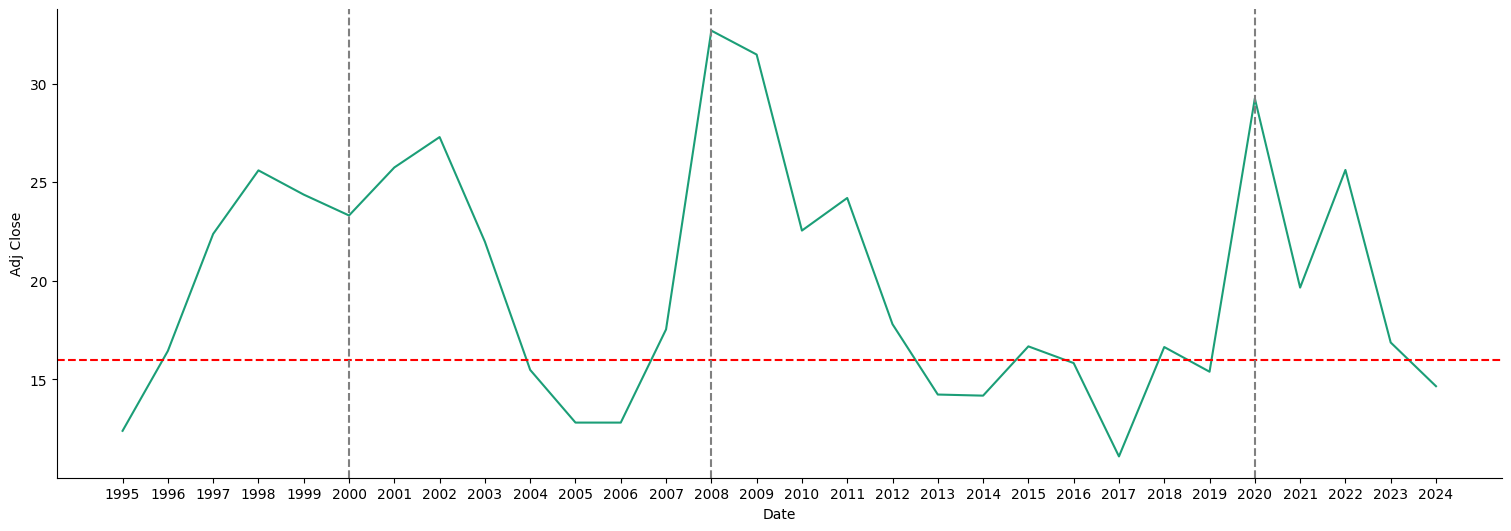

In [ ]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Adj Close']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(15, 5.2), layout='constrained')
df_sorted = vix_95al24.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.xticks(df_sorted['Date'])
plt.axhline(y=16, color='r', linestyle='--')
_ = plt.ylabel('Adj Close')

# Años de crisis
crisis_years = [2000, 2008, 2020]  # Burbuja dot com, crisis financiera, pandemia
for year in crisis_years:
  plt.axvline(x=year, color='gray', linestyle='--')

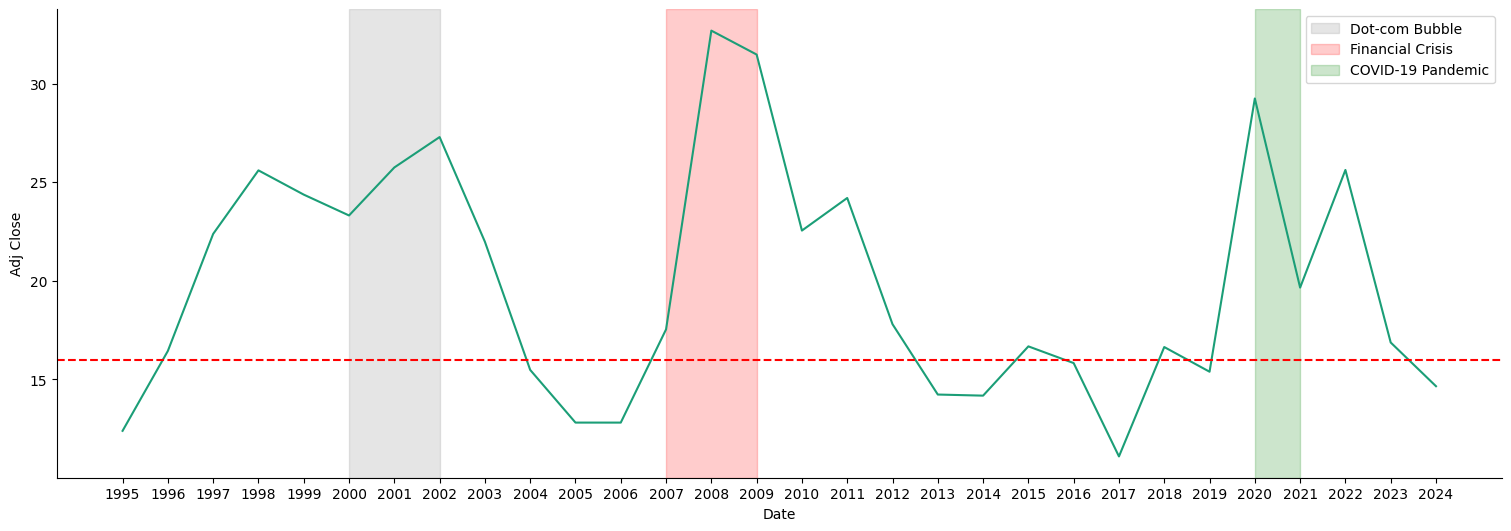

In [ ]:
# prompt: marcame en el anterior grafico los años de las grande crisis economicas de estados unidos, tanto cuando empezo y termino

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Adj Close']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(15, 5.2), layout='constrained')
df_sorted = vix_95al24.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.xticks(df_sorted['Date'])
plt.axhline(y=16, color='r', linestyle='--')
_ = plt.ylabel('Adj Close')

# Mark crisis periods
plt.axvspan(2000, 2002, alpha=0.2, color='gray', label='Dot-com Bubble')
plt.axvspan(2007, 2009, alpha=0.2, color='red', label='Financial Crisis')
plt.axvspan(2020, 2021, alpha=0.2, color='green', label='COVID-19 Pandemic')

plt.legend()
plt.show()
